In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import csv
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDClassifier

In [2]:
readIn = pd.read_csv("data/df_dummy_prepped-2-2.csv")
df = pd.DataFrame(readIn)

In [3]:
readIn = pd.read_csv("data/training_data.csv")
df_og = pd.DataFrame(readIn)


In [4]:
cols_to_keep=['CONTRACT_ID','BORROWER_ID', 'CONTRACT_CREDIT_LOSS']
df_og=df_og[cols_to_keep]

In [5]:
df_og.shape

(1602753, 3)

In [6]:
df.shape

(1602753, 490)

In [7]:
df=df.drop('CONTRACT_CREDIT_LOSS', axis=1)

In [8]:
merged_df = pd.merge(df, df_og, on=['CONTRACT_ID', 'BORROWER_ID'], how='left')
merged_df.isna().sum()

CONTRACT_ID                                         0
BORROWER_ID                                         0
CONTRACT_DATE_OF_LOAN_AGREEMENT                     0
CONTRACT_DEPT_SERVICE_TO_INCOME                     0
CONTRACT_INCOME                                     0
                                                ...  
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_110001.0        0
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140001.0        0
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0        0
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0        0
CONTRACT_CREDIT_LOSS                            36154
Length: 490, dtype: int64

In [9]:
del df
del df_og

In [10]:
input=list(merged_df.columns)

<Axes: >

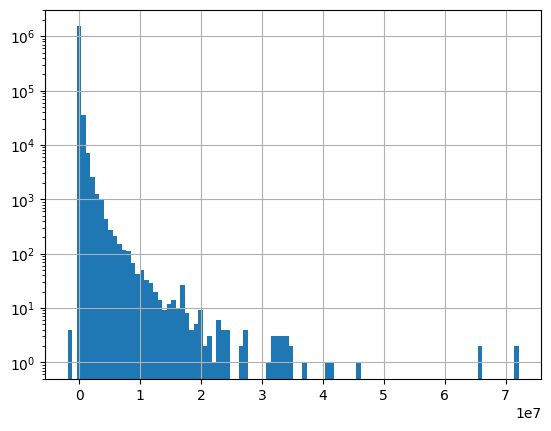

In [11]:
merged_df ['CONTRACT_CREDIT_LOSS'].hist(bins=100, log=True)
# merged_df ['CONTRACT_TYPE_OF_INTEREST_REPAYMENT'].isna().sum()

In [12]:
to_remove=['CONTRACT_ID', 'BORROWER_ID', 'CONTRACT_DATE_OF_LOAN_AGREEMENT','CONTRACT_MATURITY_DATE', 'TARGET_EVENT_DAY', 'TARGET_EVENT']

In [13]:
new_input = [x for x in input if x not in to_remove]

In [14]:
new_input.remove('CONTRACT_CREDIT_LOSS')

In [15]:
class_df=merged_df.dropna(subset=['CONTRACT_CREDIT_LOSS'], axis=0)

In [16]:
target= 'CONTRACT_CREDIT_LOSS'

In [17]:
X = class_df[new_input]
y = class_df[target]

In [18]:
y.isna().sum()

0

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [20]:
del X
del y

In [21]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
del X_train
del y_train

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [25]:
from sklearn.metrics import accuracy_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [28]:
def calculate_mape(y_true, y_pred):
    # Avoid division by zero
    mask = y_true != 0
    y_true_masked = y_true[mask]
    y_pred_masked = y_pred[mask]

    # Calculate absolute percentage error
    absolute_percentage_error = np.abs((y_true_masked - y_pred_masked) / y_true_masked)

    # Calculate mean absolute percentage error
    mape = np.mean(absolute_percentage_error) * 100

    return mape

In [30]:
mape = calculate_mape(y_test, y_pred)


In [31]:
print(f'Model pontossága: {mape}')

Model pontossága: 588.3582520967921


In [ ]:
del y_pred
del y_test
del X_test

In [ ]:
merged_df['res']=model.predict(merged_df[new_input])

In [ ]:
merged_df['res'].hist(bins=100, log=True)

In [ ]:
merged_df['CONTRACT_CREDIT_LOSS'] = merged_df.apply(lambda row: row['res'] if pd.isna(row['CONTRACT_CREDIT_LOSS']) else row['CONTRACT_CREDIT_LOSS'], axis=1)
merged_df=merged_df.drop('res', axis=1)

In [ ]:
merged_df['CONTRACT_CREDIT_LOSS'].isna().sum()

In [ ]:
merged_df

In [ ]:
merged_df.to_csv('data/df_dummy_prepped-2-3.csv', index=False)